In [1]:
import cuml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_recall_fscore_support)

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import time

# random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [3]:
print("\n[1] LOADING DATA...")
df = pd.read_csv('covtype.csv')

print(f"Dataset shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")
print(f"Samples: {df.shape[0]}")

print("\n[2] EXPLORATORY DATA ANALYSIS...")

# Basic info
print("\nDataset Info:")
print(df.info())




[1] LOADING DATA...
Dataset shape: (581012, 55)
Features: 54
Samples: 581012

[2] EXPLORATORY DATA ANALYSIS...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  

## CHecking missing values

In [4]:
print("\nMissing Values:")
print(df.isnull().sum().sum())



Missing Values:
0


In [5]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

Elevation: 0
Aspect: 0
Slope: 0
Horizontal_Distance_To_Hydrology: 0
Vertical_Distance_To_Hydrology: 0
Horizontal_Distance_To_Roadways: 0
Hillshade_9am: 0
Hillshade_Noon: 0
Hillshade_3pm: 0
Horizontal_Distance_To_Fire_Points: 0
Wilderness_Area1: 0
Wilderness_Area2: 0
Wilderness_Area3: 0
Wilderness_Area4: 0
Soil_Type1: 0
Soil_Type2: 0
Soil_Type3: 0
Soil_Type4: 0
Soil_Type5: 0
Soil_Type6: 0
Soil_Type7: 0
Soil_Type8: 0
Soil_Type9: 0
Soil_Type10: 0
Soil_Type11: 0
Soil_Type12: 0
Soil_Type13: 0
Soil_Type14: 0
Soil_Type15: 0
Soil_Type16: 0
Soil_Type17: 0
Soil_Type18: 0
Soil_Type19: 0
Soil_Type20: 0
Soil_Type21: 0
Soil_Type22: 0
Soil_Type23: 0
Soil_Type24: 0
Soil_Type25: 0
Soil_Type26: 0
Soil_Type27: 0
Soil_Type28: 0
Soil_Type29: 0
Soil_Type30: 0
Soil_Type31: 0
Soil_Type32: 0
Soil_Type33: 0
Soil_Type34: 0
Soil_Type35: 0
Soil_Type36: 0
Soil_Type37: 0
Soil_Type38: 0
Soil_Type39: 0
Soil_Type40: 0
Cover_Type: 0


In [6]:

print("\nTarget Distribution:")
print(df['Cover_Type'].value_counts().sort_index())
print("\nTarget Percentages:")
print(df['Cover_Type'].value_counts(normalize=True).sort_index() * 100)




Target Distribution:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

Target Percentages:
Cover_Type
1    36.460521
2    48.759922
3     6.153746
4     0.472796
5     1.633873
6     2.989095
7     3.530048
Name: proportion, dtype: float64


In [7]:
# Statistical summary
print("\nNumerical Features Summary:")
numerical_features = ['Elevation', 'Aspect', 'Slope',
                     'Horizontal_Distance_To_Hydrology',
                     'Vertical_Distance_To_Hydrology',
                     'Horizontal_Distance_To_Roadways',
                     'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                     'Horizontal_Distance_To_Fire_Points']
print(df[numerical_features].describe())


Numerical Features Summary:
           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.0

## Visualization : Target Distribution

✓ Saved: cover_type_distribution.png


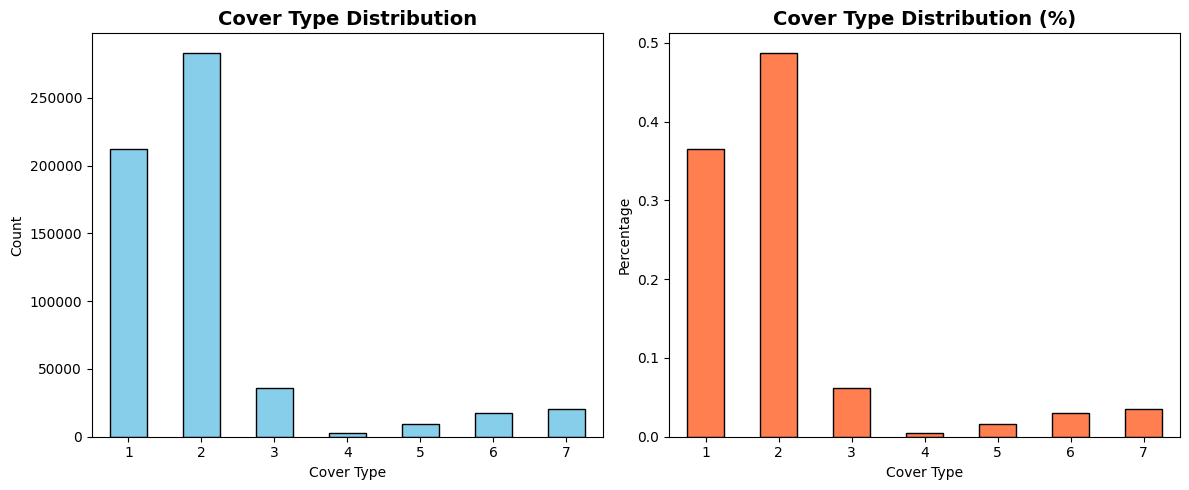

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Cover_Type'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cover Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Cover_Type'].value_counts(normalize=True).sort_index().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Cover Type Distribution (%)', fontsize=14, fontweight='bold')
plt.xlabel('Cover Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('cover_type_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Saved: cover_type_distribution.png")

## Visualization : Feature Distributions

✓ Saved: feature_distributions.png


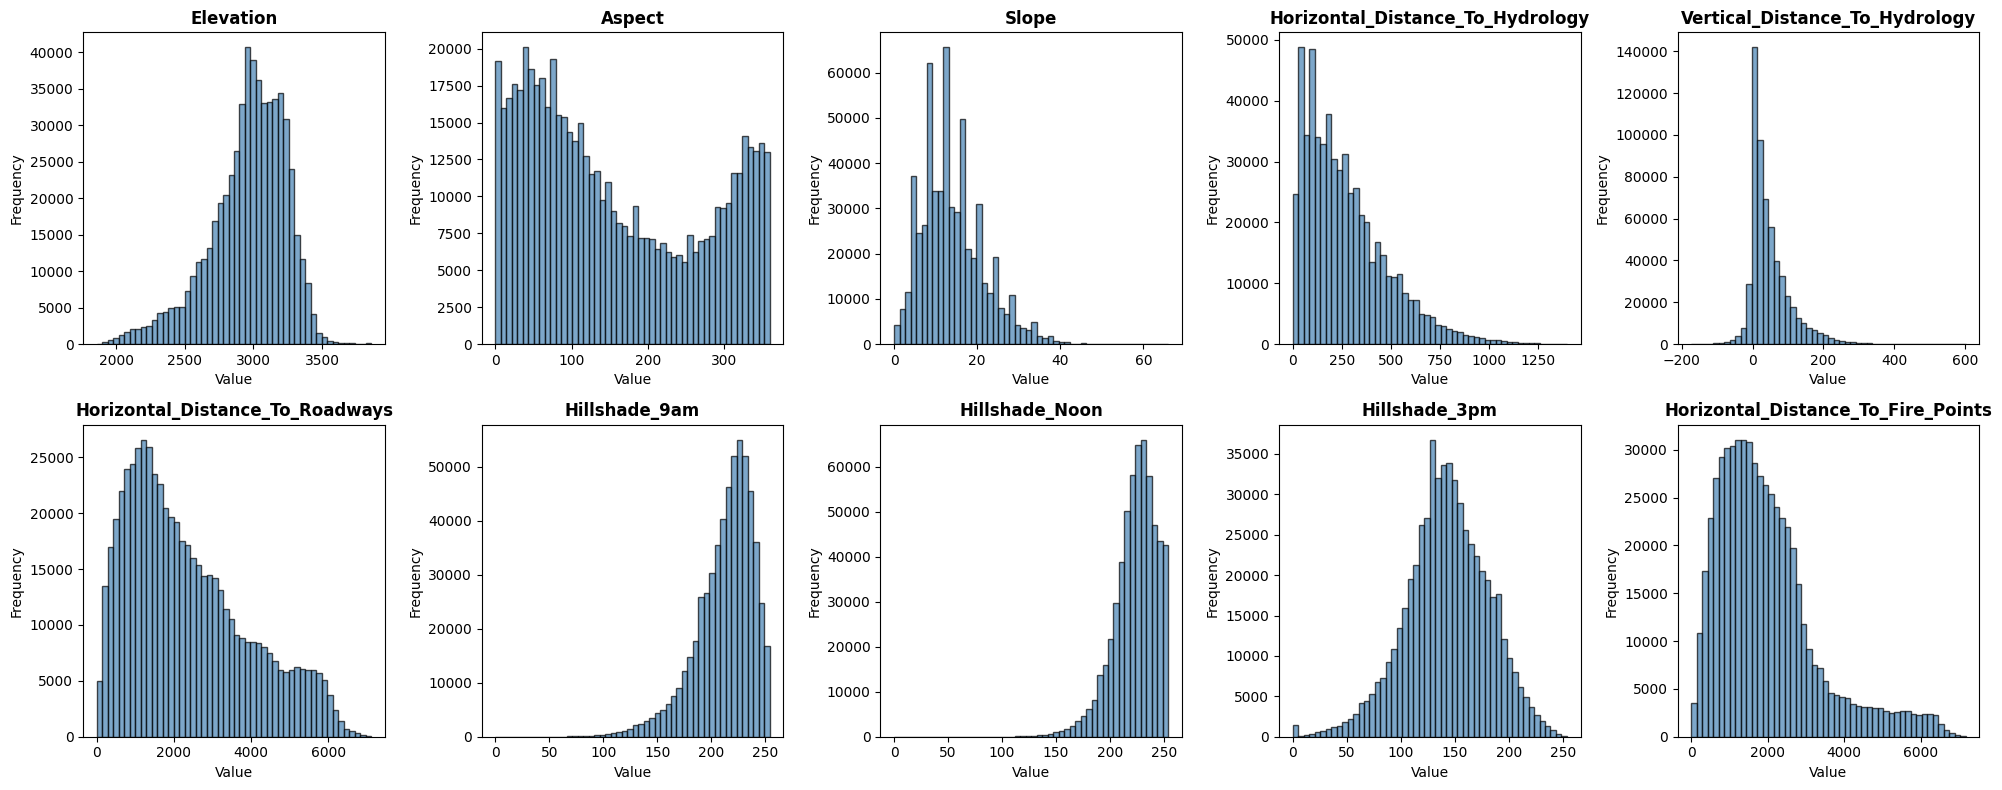

In [9]:

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()
for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Saved: feature_distributions.png")

## Visualization : Correlation Matrix

✓ Saved: correlation_matrix.png


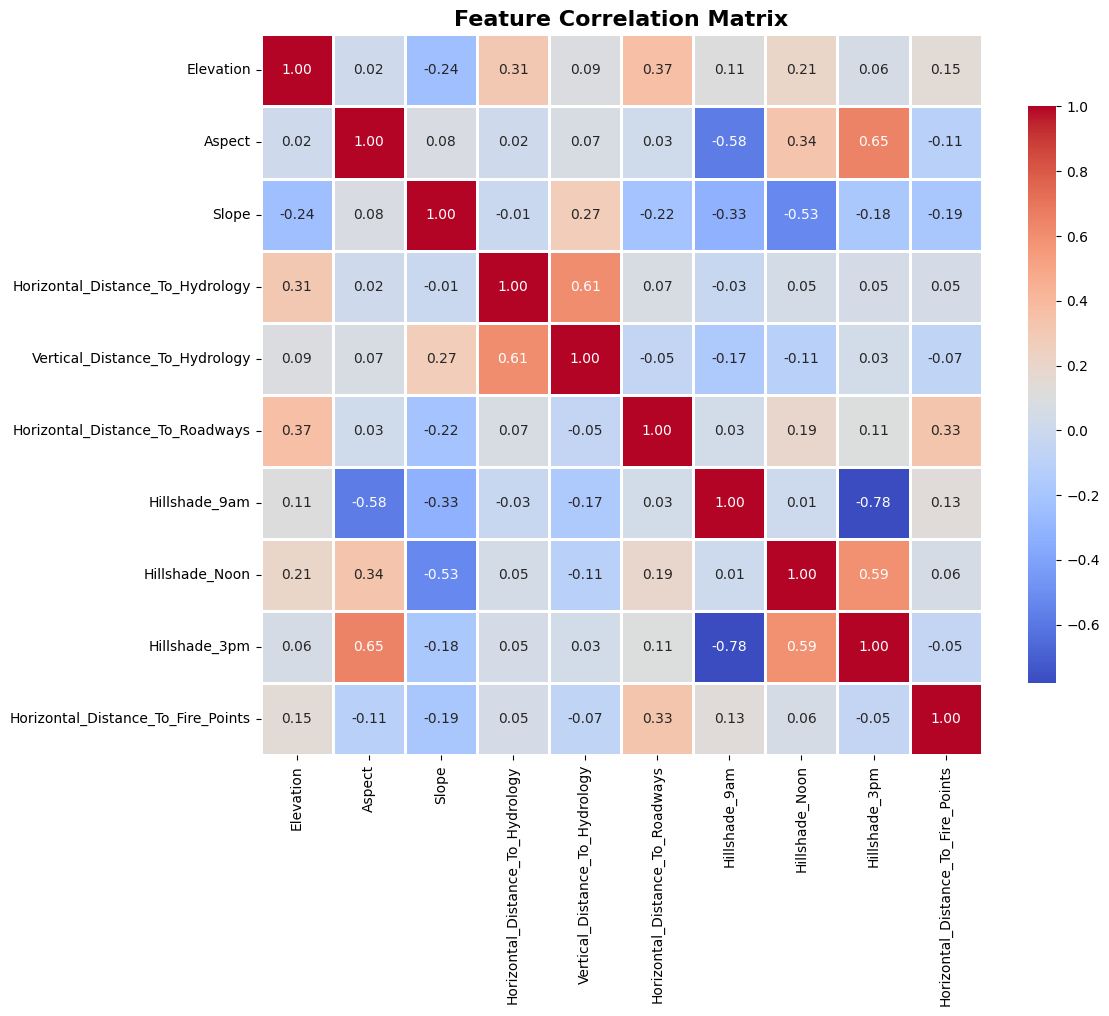

In [10]:

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Saved: correlation_matrix.png")

## Visualization : Elevation by Cover Type

✓ Saved: elevation_by_cover_type.png


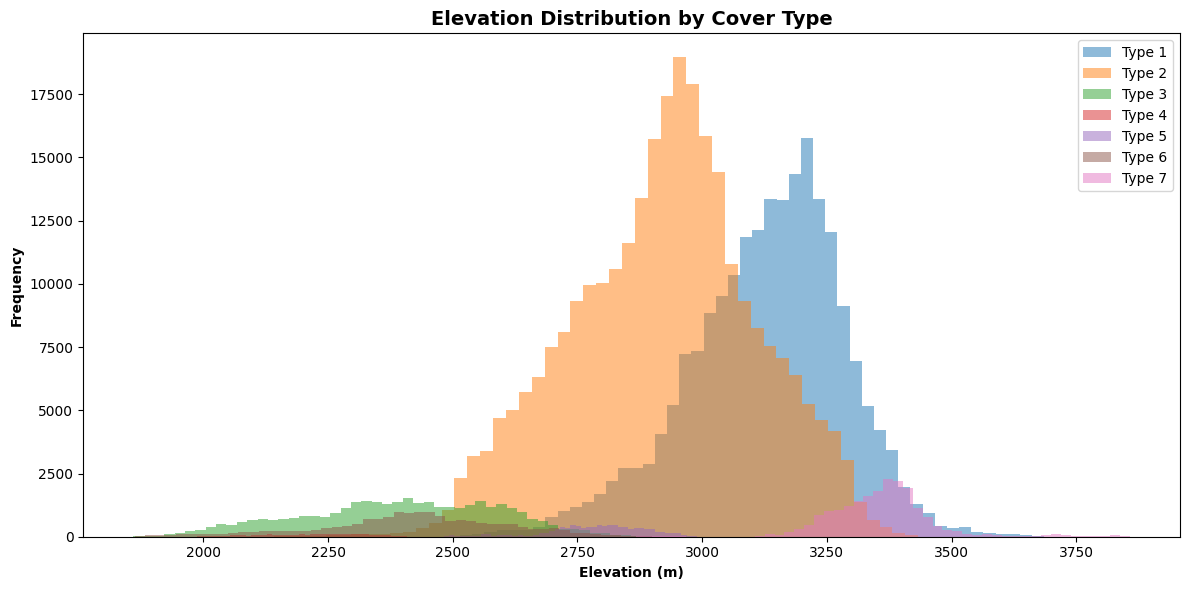

In [11]:

plt.figure(figsize=(12, 6))
for cover_type in sorted(df['Cover_Type'].unique()):
    subset = df[df['Cover_Type'] == cover_type]
    plt.hist(subset['Elevation'], bins=50, alpha=0.5, label=f'Type {cover_type}')
plt.xlabel('Elevation (m)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Elevation Distribution by Cover Type', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('elevation_by_cover_type.png', dpi=300, bbox_inches='tight')
print("✓ Saved: elevation_by_cover_type.png")


In [12]:
# ============================================================================
# 3. DATA PREPROCESSING
# ============================================================================
print("\n[3] DATA PREPROCESSING...")

# Separate features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


[3] DATA PREPROCESSING...
Features shape: (581012, 54)
Target shape: (581012,)

Training set: 464809 samples
Test set: 116203 samples


In [13]:
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Feature scaling completed")

✓ Feature scaling completed


In [14]:
import time
import cupy as cp
from cuml.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.datasets import make_classification

# Seed & Sizes
RANDOM_SEED = 42
N_SAMPLES = 200000
N_FEATURES = 50
N_CLASSES = 7
sample_size = 50000

# ============================================================================
# STEP 1 — Create 7-class synthetic dataset
# You can adjust weights as per your imbalance level.
# For example: 7 classes, slightly imbalanced:
# weights=[0.30,0.20,0.15,0.10,0.10,0.10,0.05]
# If you want fully balanced, REMOVE the weights line.
# ============================================================================
X_cpu, y_cpu = make_classification(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_informative=25,
    n_redundant=0,
    n_classes=N_CLASSES,
    random_state=RANDOM_SEED,
    # weights=[0.30,0.20,0.15,0.10,0.10,0.10,0.05]  # <-- 7 classes imbalance example
)

# ============================================================================
# STEP 2 — Stratified Train/Test Split (multi-class OK)
# ============================================================================
X_train_cpu, X_test_cpu, y_train_cpu, y_test_cpu = train_test_split(
    X_cpu,
    y_cpu,
    test_size=0.2,
    stratify=y_cpu,      # Multi-class stratification
    random_state=RANDOM_SEED
)

# ============================================================================
# STEP 3 — STRATIFIED SUBSAMPLING for SVM
# This is crucial to preserve the ratio for ALL 7 classes.
# ============================================================================
sss = StratifiedShuffleSplit(
    n_splits=1,
    train_size=sample_size,
    random_state=RANDOM_SEED
)

train_idx, _ = next(sss.split(X_train_cpu, y_train_cpu))

X_train_sub_cpu = X_train_cpu[train_idx]
y_train_sub_cpu = y_train_cpu[train_idx]

# Convert to GPU
X_train_gpu = cp.asarray(X_train_sub_cpu)
y_train_gpu = cp.asarray(y_train_sub_cpu)
X_test_gpu = cp.asarray(X_test_cpu)

# ============================================================================
# STEP 4 — Train SVM on GPU
# class_weight='balanced' works for multi-class automatically.
# ============================================================================
print("\n[Model] Multi-Class SVM (cuML, GPU Accelerated)")
print("-" * 80)

svm = SVC(
    kernel='rbf',
    C=10.0,
    gamma='scale',
    class_weight='balanced'   # <-- VERY IMPORTANT for imbalanced 7 classes
)

start = time.time()
svm.fit(X_train_gpu, y_train_gpu)
training_time = time.time() - start

# ============================================================================
# STEP 5 — Predict on test set
# ============================================================================
y_pred_gpu = svm.predict(X_test_gpu)
y_pred_cpu = y_pred_gpu.get()

# ============================================================================
# STEP 6 — Compute metrics (multi-class)
# ============================================================================
accuracy = accuracy_score(y_test_cpu, y_pred_cpu)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test_cpu, y_pred_cpu, average='weighted', zero_division=0
)

print(f"Training Time: {training_time:.2f}s (on {sample_size} stratified samples)")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

print("\nConfusion Matrix (7 classes):")
print(confusion_matrix(y_test_cpu, y_pred_cpu))

print("\nClassification Report:")
print(classification_report(y_test_cpu, y_pred_cpu, zero_division=0))



[Model] Multi-Class SVM (cuML, GPU Accelerated)
--------------------------------------------------------------------------------
Training Time: 12.96s (on 50000 stratified samples)
Accuracy:  0.9499
Precision: 0.9499
Recall:    0.9499
F1-Score:  0.9499

Confusion Matrix (7 classes):
[[5396   51   57   41   67   39   70]
 [  53 5450   48   46   46   35   42]
 [  42   34 5475   43   47   28   41]
 [  47   55   29 5370   54   87   67]
 [  45   28   51   38 5449   47   62]
 [  34   45   26   64   50 5445   46]
 [  63   46   44   60   52   33 5412]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5721
           1       0.95      0.95      0.95      5720
           2       0.96      0.96      0.96      5710
           3       0.95      0.94      0.94      5709
           4       0.95      0.95      0.95      5720
           5       0.95      0.95      0.95      5710
           6       0.94      0.95      0.95  

In [15]:
import sys
!{sys.executable} -m pip install optuna
import optuna

In [21]:
# ============================================
# OPTUNA HYPERPARAMETER TUNING (MINIMAL)
# ============================================

import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from cuml.metrics import accuracy_score as cuml_accuracy_score

NFOLDS = 3
start_time = time.time()

skf = StratifiedKFold(
    n_splits=NFOLDS,
    shuffle=True,
    random_state=RANDOM_SEED
)

def objective(trial):

    C = trial.suggest_loguniform("C", 1e-2, 1e2)
    gamma = trial.suggest_categorical("gamma", ["scale", "auto", 0.01, 0.1, 1])
    kernel = trial.suggest_categorical("kernel", ["rbf", "poly", "sigmoid"])
    coef0 = trial.suggest_float("coef0", 0.0, 1.0)
    tol = trial.suggest_loguniform("tol", 1e-5, 1e-2)



    model = SVC(
        C=C,
        gamma=gamma,
        kernel=kernel,
        coef0=coef0,
        tol=tol,
        class_weight="balanced"
    )

    fold_scores = []

    dummy = np.zeros(len(y_train_sub_cpu))  # only for generating folds

    for tr_idx, val_idx in skf.split(dummy, y_train_sub_cpu):

        tr_gpu = cp.asarray(tr_idx)
        val_gpu = cp.asarray(val_idx)

        X_tr = X_train_gpu[tr_gpu]
        y_tr = y_train_gpu[tr_gpu]

        X_val = X_train_gpu[val_gpu]
        y_val = y_train_gpu[val_gpu]

        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)

        acc = cuml_accuracy_score(y_val, preds)
        fold_scores.append(float(acc))

    return np.mean(fold_scores)


print("\n[OPTUNA] Starting Multi-Class SVM tuning...")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, show_progress_bar=True)

training_time = time.time() - start_time

print("\nBest score:", study.best_value)
print("Best parameters:", study.best_params)


[I 2025-12-12 11:20:29,405] A new study created in memory with name: no-name-e1b16bcf-496c-428f-ae1f-ba1644852f47



[OPTUNA] Starting Multi-Class SVM tuning...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-12-12 11:20:52,626] Trial 0 finished with value: 0.13347995250583408 and parameters: {'C': 0.5393856643422849, 'gamma': 0.01, 'kernel': 'sigmoid', 'coef0': 0.7507244320290352, 'tol': 1.3942869581055034e-05}. Best is trial 0 with value: 0.13347995250583408.
[I 2025-12-12 11:21:18,715] Trial 1 finished with value: 0.25805987660398 and parameters: {'C': 0.05184347106972338, 'gamma': 'scale', 'kernel': 'sigmoid', 'coef0': 0.880995061020634, 'tol': 6.923647684520514e-05}. Best is trial 1 with value: 0.25805987660398.
[I 2025-12-12 11:21:48,099] Trial 2 finished with value: 0.9257800311412469 and parameters: {'C': 0.2214843920302808, 'gamma': 0.01, 'kernel': 'poly', 'coef0': 0.03334435530099633, 'tol': 0.0005144080499840397}. Best is trial 2 with value: 0.9257800311412469.
[I 2025-12-12 11:22:24,431] Trial 3 finished with value: 0.7443197433903236 and parameters: {'C': 0.24402305387302362, 'gamma': 'auto', 'kernel': 'rbf', 'coef0': 0.09471896318621065, 'tol': 3.813106128754914e-05}. 

In [22]:
# ============================================
# TRAIN FINAL MODEL USING BEST OPTUNA PARAMS
# ============================================
results = []
best_params = study.best_params

best_svm_model = SVC(
    C=best_params["C"],
    gamma=best_params["gamma"],
    kernel="rbf",                 # Always rbf for cuML multi-class
    class_weight="balanced"       # Important fix
)

# Train the final SVM on the GPU data (50k stratified subset)
best_svm_model.fit(X_train_gpu, y_train_gpu)

# Predict on GPU test data
y_pred_best_gpu = best_svm_model.predict(X_test_gpu)
y_pred_best = y_pred_best_gpu.get()  # convert to NumPy for sklearn metrics

# Compute test metrics
accuracy_tuned = accuracy_score(y_test_cpu, y_pred_best)
precision_tuned, recall_tuned, f1_tuned, _ = precision_recall_fscore_support(
    y_test_cpu, y_pred_best, average="weighted", zero_division=0
)

print("\nFinal SVM Model (Tuned with Optuna) Performance on Test Set:")
print("-------------------------------------------------------------")
print(f"Accuracy : {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall   : {recall_tuned:.4f}")
print(f"F1-score : {f1_tuned:.4f}")

# Store result
results.append({
    "Model": "SVM (RBF, Tuned - Optuna)",
    "Accuracy": accuracy_tuned,
    "Precision": precision_tuned,
    "Recall": recall_tuned,
    "F1-Score": f1_tuned,
    "Training_Time": training_time  # tuning time from Optuna
})

# Classification report
print("\nClassification Report for Tuned SVM (Optuna):")
print(classification_report(y_test_cpu, y_pred_best, zero_division=0))



Final SVM Model (Tuned with Optuna) Performance on Test Set:
-------------------------------------------------------------
Accuracy : 0.9486
Precision: 0.9489
Recall   : 0.9486
F1-score : 0.9486

Classification Report for Tuned SVM (Optuna):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5721
           1       0.92      0.96      0.94      5720
           2       0.95      0.96      0.96      5710
           3       0.96      0.94      0.95      5709
           4       0.95      0.95      0.95      5720
           5       0.96      0.95      0.95      5710
           6       0.95      0.94      0.95      5710

    accuracy                           0.95     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.95      0.95      0.95     40000



## Logistic REgression

In [ ]:

print("\n[Model 2] Logistic Regression")
print("-" * 80)

start_time = time.time()
lr_model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0,
    random_state=RANDOM_SEED,
    n_jobs=-1
)
lr_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

y_pred_lr = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lr)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='weighted')

print(f"Training Time: {training_time:.2f}s")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Training_Time': training_time
})


[Model 2] Logistic Regression
--------------------------------------------------------------------------------
Training Time: 31.70s
Accuracy: 0.8047
Precision: 0.7940
Recall: 0.8047
F1-Score: 0.7884


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.45      0.56      8011
         2.0       0.83      0.94      0.88     23691
         3.0       0.65      0.59      0.62       432
         4.0       0.83      0.89      0.86       432
         5.0       0.66      0.30      0.41       614
         6.0       0.62      0.66      0.64       432
         7.0       0.91      0.83      0.87       432

    accuracy                           0.80     34044
   macro avg       0.74      0.67      0.69     34044
weighted avg       0.79      0.80      0.79     34044



## Neural Network

In [ ]:
# ============================================================================
# Model 3: Neural Network
# ============================================================================
print("\n[Model 3] Neural Network")
print("-" * 80)

start_time = time.time()
nn_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=256,
    learning_rate='adaptive',
    max_iter=50,
    random_state=RANDOM_SEED,
    early_stopping=True,
    validation_fraction=0.1
)
nn_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

y_pred_nn = nn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_nn)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_nn, average='weighted')

print(f"Training Time: {training_time:.2f}s")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

results.append({
    'Model': 'Neural Network',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Training_Time': training_time
})


[Model 3] Neural Network
--------------------------------------------------------------------------------
Training Time: 124.61s
Accuracy: 0.9220
Precision: 0.9214
Recall: 0.9220
F1-Score: 0.9214


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))


Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.83      0.86      8011
         2.0       0.94      0.96      0.95     23691
         3.0       0.74      0.69      0.72       432
         4.0       0.95      0.88      0.91       432
         5.0       0.80      0.80      0.80       614
         6.0       0.71      0.79      0.75       432
         7.0       0.94      0.95      0.94       432

    accuracy                           0.92     34044
   macro avg       0.85      0.84      0.85     34044
weighted avg       0.92      0.92      0.92     34044



## Now applying Unsupervised Models

In [ ]:
print("\n" + "="*80)
print("PART B: UNSUPERVISED LEARNING (CLUSTERING) MODELS")
print("="*80)
print("\nNote: Clustering models are unsupervised, so we evaluate by comparing")
print("their cluster assignments to the true labels using clustering metrics.")

clustering_results = []

sample_size = 100000
indices = np.random.choice(X_train_scaled.shape[0], min(sample_size, X_train_scaled.shape[0]), replace=False)
X_train_cluster = X_train_scaled[indices]
y_train_cluster = y_train.iloc[indices]

test_indices = np.random.choice(X_test_scaled.shape[0], min(30000, X_test_scaled.shape[0]), replace=False)
X_test_cluster = X_test_scaled[test_indices]
y_test_cluster = y_test.iloc[test_indices]

print(f"\nUsing {len(X_train_cluster)} training samples and {len(X_test_cluster)} test samples for clustering")



PART B: UNSUPERVISED LEARNING (CLUSTERING) MODELS

Note: Clustering models are unsupervised, so we evaluate by comparing
their cluster assignments to the true labels using clustering metrics.

Using 100000 training samples and 30000 test samples for clustering


## K-means Clustering

In [ ]:
# ============================================================================
# Model 8: K-Means Clustering
# ============================================================================
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
print("\n[Model 8/10] K-Means Clustering")
print("-" * 80)

start_time = time.time()
kmeans_model = KMeans(
    n_clusters=7,  # We know there are 7 cover types
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=RANDOM_SEED
)
kmeans_model.fit(X_train_cluster)
training_time = time.time() - start_time

# Predict on test set
cluster_labels_test = kmeans_model.predict(X_test_cluster)

# Evaluate clustering quality
ari = adjusted_rand_score(y_test_cluster, cluster_labels_test)
nmi = normalized_mutual_info_score(y_test_cluster, cluster_labels_test)
silhouette = silhouette_score(X_test_cluster, cluster_labels_test, sample_size=5000)

print(f"Training Time: {training_time:.2f}s")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Info (NMI): {nmi:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Inertia (within-cluster sum of squares): {kmeans_model.inertia_:.2f}")

clustering_results.append({
    'Model': 'K-Means',
    'ARI': ari,
    'NMI': nmi,
    'Silhouette': silhouette,
    'Training_Time': training_time
})


[Model 8/10] K-Means Clustering
--------------------------------------------------------------------------------
Training Time: 6.37s
Adjusted Rand Index (ARI): 0.0617
Normalized Mutual Info (NMI): 0.1723
Silhouette Score: 0.1258
Inertia (within-cluster sum of squares): 4216820.92


### Cluster Size Distribution

In [ ]:
print("\nCluster Size Distribution:")
unique, counts = np.unique(cluster_labels_test, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples ({count/len(cluster_labels_test)*100:.1f}%)")



Cluster Size Distribution:
  Cluster 0: 1941 samples (6.5%)
  Cluster 1: 14152 samples (47.2%)
  Cluster 2: 7103 samples (23.7%)
  Cluster 3: 70 samples (0.2%)
  Cluster 4: 1 samples (0.0%)
  Cluster 5: 6732 samples (22.4%)
  Cluster 6: 1 samples (0.0%)


## Visualize cluster centers in 2D (using first 2 principal components)

✓ Saved: kmeans_clustering.png


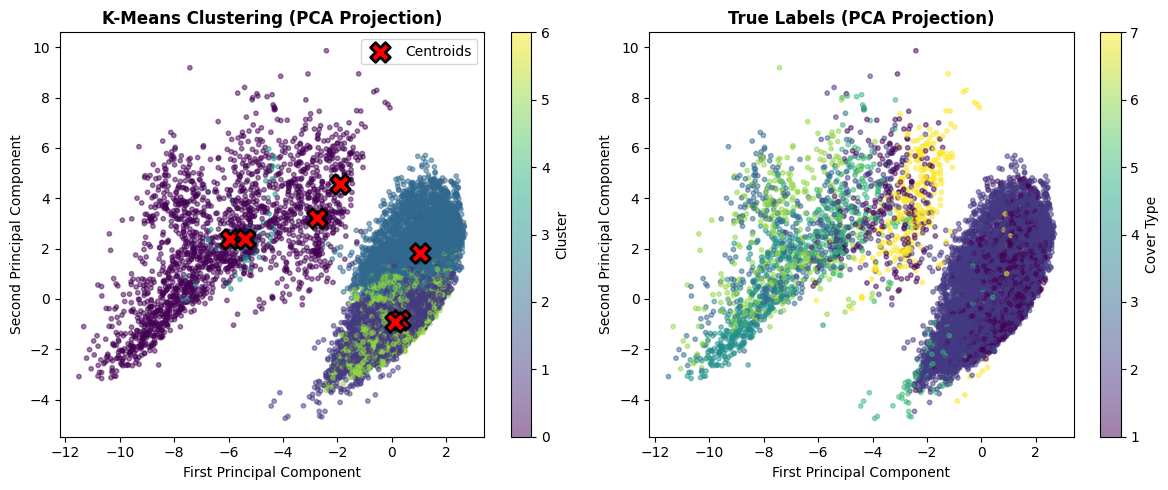

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=RANDOM_SEED)
X_test_pca = pca.fit_transform(X_test_cluster)
centers_pca = pca.transform(kmeans_model.cluster_centers_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=cluster_labels_test,
                     cmap='viridis', alpha=0.5, s=10)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200,
           edgecolor='black', linewidth=2, label='Centroids')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering (PCA Projection)', fontweight='bold')
plt.legend()
plt.colorbar(scatter, label='Cluster')

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_cluster,
                     cmap='viridis', alpha=0.5, s=10)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('True Labels (PCA Projection)', fontweight='bold')
plt.colorbar(scatter, label='Cover Type')
plt.tight_layout()
plt.savefig('kmeans_clustering.png', dpi=300, bbox_inches='tight')
print("✓ Saved: kmeans_clustering.png")

## Guassian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture
print("\n[Model 9/10] Gaussian Mixture Model (GMM)")
print("-" * 80)

start_time = time.time()
gmm_model = GaussianMixture(
    n_components=7,
    covariance_type='full',
    max_iter=100,
    n_init=3,
    random_state=RANDOM_SEED
)
gmm_model.fit(X_train_cluster)
training_time = time.time() - start_time

# Predict on test set
cluster_labels_test_gmm = gmm_model.predict(X_test_cluster)

# Evaluate clustering quality
ari_gmm = adjusted_rand_score(y_test_cluster, cluster_labels_test_gmm)
nmi_gmm = normalized_mutual_info_score(y_test_cluster, cluster_labels_test_gmm)
silhouette_gmm = silhouette_score(X_test_cluster, cluster_labels_test_gmm, sample_size=5000)

print(f"Training Time: {training_time:.2f}s")
print(f"Adjusted Rand Index (ARI): {ari_gmm:.4f}")
print(f"Normalized Mutual Info (NMI): {nmi_gmm:.4f}")
print(f"Silhouette Score: {silhouette_gmm:.4f}")
print(f"BIC (Bayesian Information Criterion): {gmm_model.bic(X_test_cluster):.2f}")
print(f"AIC (Akaike Information Criterion): {gmm_model.aic(X_test_cluster):.2f}")
print(f"Log-Likelihood: {gmm_model.score(X_test_cluster):.2f}")

clustering_results.append({
    'Model': 'GMM',
    'ARI': ari_gmm,
    'NMI': nmi_gmm,
    'Silhouette': silhouette_gmm,
    'Training_Time': training_time
})


[Model 9/10] Gaussian Mixture Model (GMM)
--------------------------------------------------------------------------------
Training Time: 125.57s
Adjusted Rand Index (ARI): 0.0670
Normalized Mutual Info (NMI): 0.1536
Silhouette Score: 0.0992
BIC (Bayesian Information Criterion): -7973922.22
AIC (Akaike Information Criterion): -8063484.42
Log-Likelihood: 134.75


## Cluster Distribution

In [ ]:
print("\nCluster Size Distribution:")
unique, counts = np.unique(cluster_labels_test_gmm, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples ({count/len(cluster_labels_test_gmm)*100:.1f}%)")



Cluster Size Distribution:
  Cluster 0: 462 samples (1.5%)
  Cluster 1: 6369 samples (21.2%)
  Cluster 2: 1771 samples (5.9%)
  Cluster 3: 11376 samples (37.9%)
  Cluster 4: 31 samples (0.1%)
  Cluster 5: 9870 samples (32.9%)
  Cluster 6: 121 samples (0.4%)


## Visualize GMM clustering

✓ Saved: gmm_clustering.png


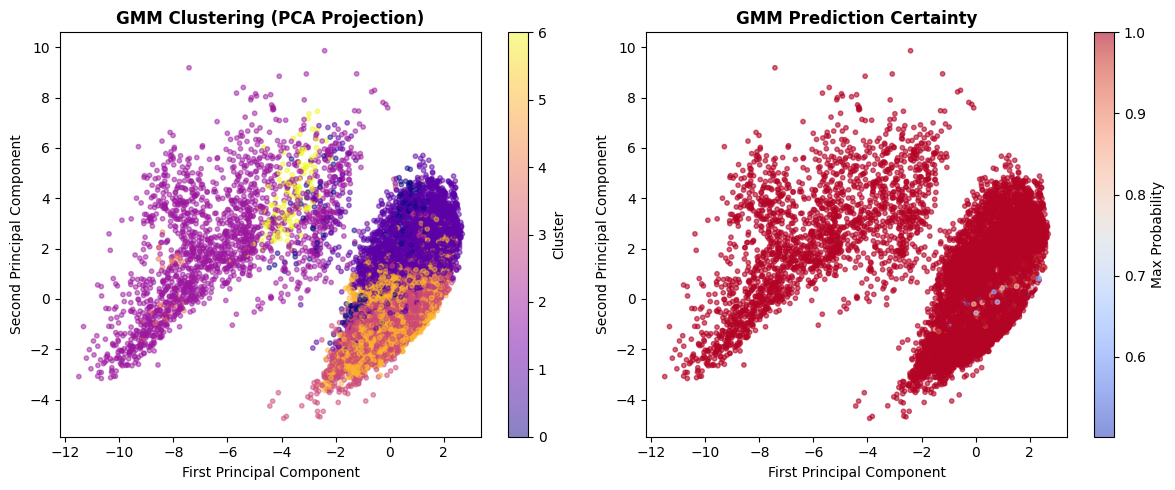

In [ ]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=cluster_labels_test_gmm,
                     cmap='plasma', alpha=0.5, s=10)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('GMM Clustering (PCA Projection)', fontweight='bold')
plt.colorbar(scatter, label='Cluster')

plt.subplot(1, 2, 2)
# Get prediction probabilities
probs = gmm_model.predict_proba(X_test_cluster)
certainty = np.max(probs, axis=1)  # Confidence in cluster assignment
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=certainty,
                     cmap='coolwarm', alpha=0.6, s=10)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('GMM Prediction Certainty', fontweight='bold')
plt.colorbar(scatter, label='Max Probability')
plt.tight_layout()
plt.savefig('gmm_clustering.png', dpi=300, bbox_inches='tight')
print("✓ Saved: gmm_clustering.png")

## DBSCAN

In [ ]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# import adjusted_rand_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
print("\n[Model 10/10] DBSCAN (Density-Based Clustering)")
print("-" * 80)

start_time = time.time()
dbscan_model = DBSCAN(
    eps=3.5,  # Tuned for this dataset
    min_samples=50,
    metric='euclidean',
    n_jobs=-1
)
cluster_labels_dbscan = dbscan_model.fit_predict(X_train_cluster)
training_time = time.time() - start_time

# Predict on test set (DBSCAN doesn't have predict, so we use training labels for analysis)
print(f"Training Time: {training_time:.2f}s")

# Evaluate clustering quality on training set
n_clusters = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
n_noise = list(cluster_labels_dbscan).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise} ({n_noise/len(cluster_labels_dbscan)*100:.1f}%)")

# Calculate metrics only on non-noise points
mask = cluster_labels_dbscan != -1
if np.sum(mask) > 0:
    ari_dbscan = adjusted_rand_score(y_train_cluster[mask], cluster_labels_dbscan[mask])
    nmi_dbscan = normalized_mutual_info_score(y_train_cluster[mask], cluster_labels_dbscan[mask])

    # Silhouette score (only if we have at least 2 clusters)
    if n_clusters >= 2:
        silhouette_dbscan = silhouette_score(X_train_cluster[mask], cluster_labels_dbscan[mask],
                                            sample_size=min(5000, np.sum(mask)))
    else:
        silhouette_dbscan = 0.0

    print(f"Adjusted Rand Index (ARI): {ari_dbscan:.4f} (excluding noise)")
    print(f"Normalized Mutual Info (NMI): {nmi_dbscan:.4f} (excluding noise)")
    print(f"Silhouette Score: {silhouette_dbscan:.4f} (excluding noise)")
else:
    ari_dbscan = nmi_dbscan = silhouette_dbscan = 0.0
    print("All points classified as noise!")

clustering_results.append({
    'Model': 'DBSCAN',
    'ARI': ari_dbscan,
    'NMI': nmi_dbscan,
    'Silhouette': silhouette_dbscan,
    'Training_Time': training_time,
    'N_Clusters': n_clusters,
    'Noise_Points': n_noise
})


[Model 10/10] DBSCAN (Density-Based Clustering)
--------------------------------------------------------------------------------
Training Time: 98.95s
Number of clusters found: 54
Number of noise points: 282 (0.3%)
Adjusted Rand Index (ARI): 0.0556 (excluding noise)
Normalized Mutual Info (NMI): 0.2021 (excluding noise)
Silhouette Score: 0.4196 (excluding noise)


## Cluster Size distribution

In [ ]:
print("\nCluster Size Distribution:")
unique, counts = np.unique(cluster_labels_dbscan, return_counts=True)
for cluster_id, count in zip(unique, counts):
    if cluster_id == -1:
        print(f"  Noise points: {count} samples ({count/len(cluster_labels_dbscan)*100:.1f}%)")
    else:
        print(f"  Cluster {cluster_id}: {count} samples ({count/len(cluster_labels_dbscan)*100:.1f}%)")



Cluster Size Distribution:
  Noise points: 282 samples (0.3%)
  Cluster 0: 19789 samples (19.8%)
  Cluster 1: 136 samples (0.1%)
  Cluster 2: 8455 samples (8.5%)
  Cluster 3: 4335 samples (4.3%)
  Cluster 4: 3165 samples (3.2%)
  Cluster 5: 8456 samples (8.5%)
  Cluster 6: 2940 samples (2.9%)
  Cluster 7: 5253 samples (5.3%)
  Cluster 8: 2061 samples (2.1%)
  Cluster 9: 5217 samples (5.2%)
  Cluster 10: 1913 samples (1.9%)
  Cluster 11: 7357 samples (7.4%)
  Cluster 12: 2243 samples (2.2%)
  Cluster 13: 415 samples (0.4%)
  Cluster 14: 2277 samples (2.3%)
  Cluster 15: 4752 samples (4.8%)
  Cluster 16: 2466 samples (2.5%)
  Cluster 17: 434 samples (0.4%)
  Cluster 18: 3252 samples (3.3%)
  Cluster 19: 78 samples (0.1%)
  Cluster 20: 1169 samples (1.2%)
  Cluster 21: 291 samples (0.3%)
  Cluster 22: 640 samples (0.6%)
  Cluster 23: 940 samples (0.9%)
  Cluster 24: 1376 samples (1.4%)
  Cluster 25: 451 samples (0.5%)
  Cluster 26: 487 samples (0.5%)
  Cluster 27: 226 samples (0.2%)
  Cl

## Visualize DBSCAN clustering

✓ Saved: dbscan_clustering.png


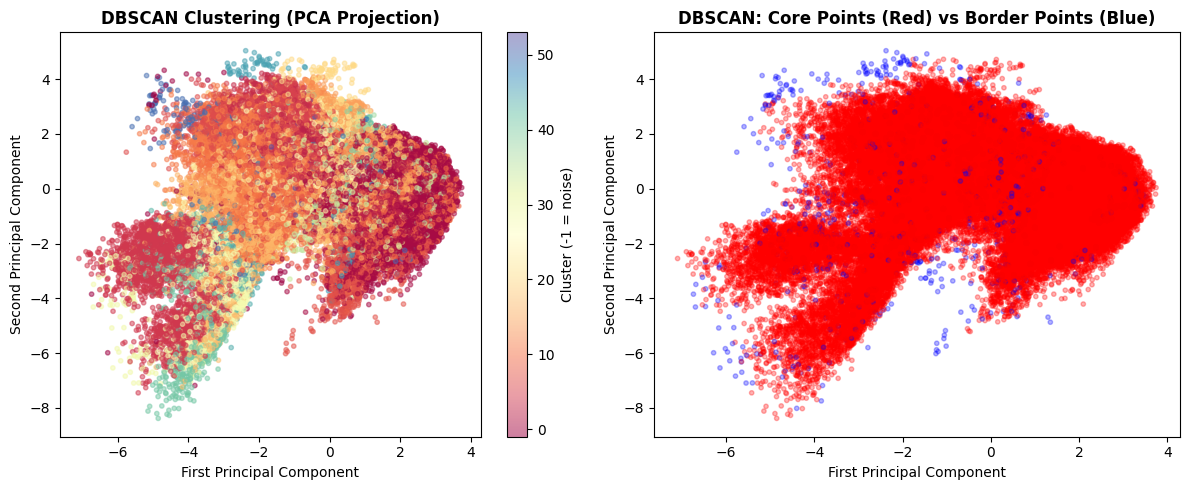

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=RANDOM_SEED)
X_train_pca = pca.fit_transform(X_train_cluster)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels_dbscan,
                     cmap='Spectral', alpha=0.5, s=10)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('DBSCAN Clustering (PCA Projection)', fontweight='bold')
plt.colorbar(scatter, label='Cluster (-1 = noise)')

plt.subplot(1, 2, 2)
# Highlight core vs non-core points
core_samples_mask = np.zeros_like(cluster_labels_dbscan, dtype=bool)
core_samples_mask[dbscan_model.core_sample_indices_] = True
colors = ['red' if x else 'blue' for x in core_samples_mask]
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=colors, alpha=0.3, s=10)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('DBSCAN: Core Points (Red) vs Border Points (Blue)', fontweight='bold')
plt.tight_layout()
plt.savefig('dbscan_clustering.png', dpi=300, bbox_inches='tight')
print("✓ Saved: dbscan_clustering.png")


[5] VISUALIZING CLUSTERING METRICS...
✓ Saved: clustering_metrics_comparison.png


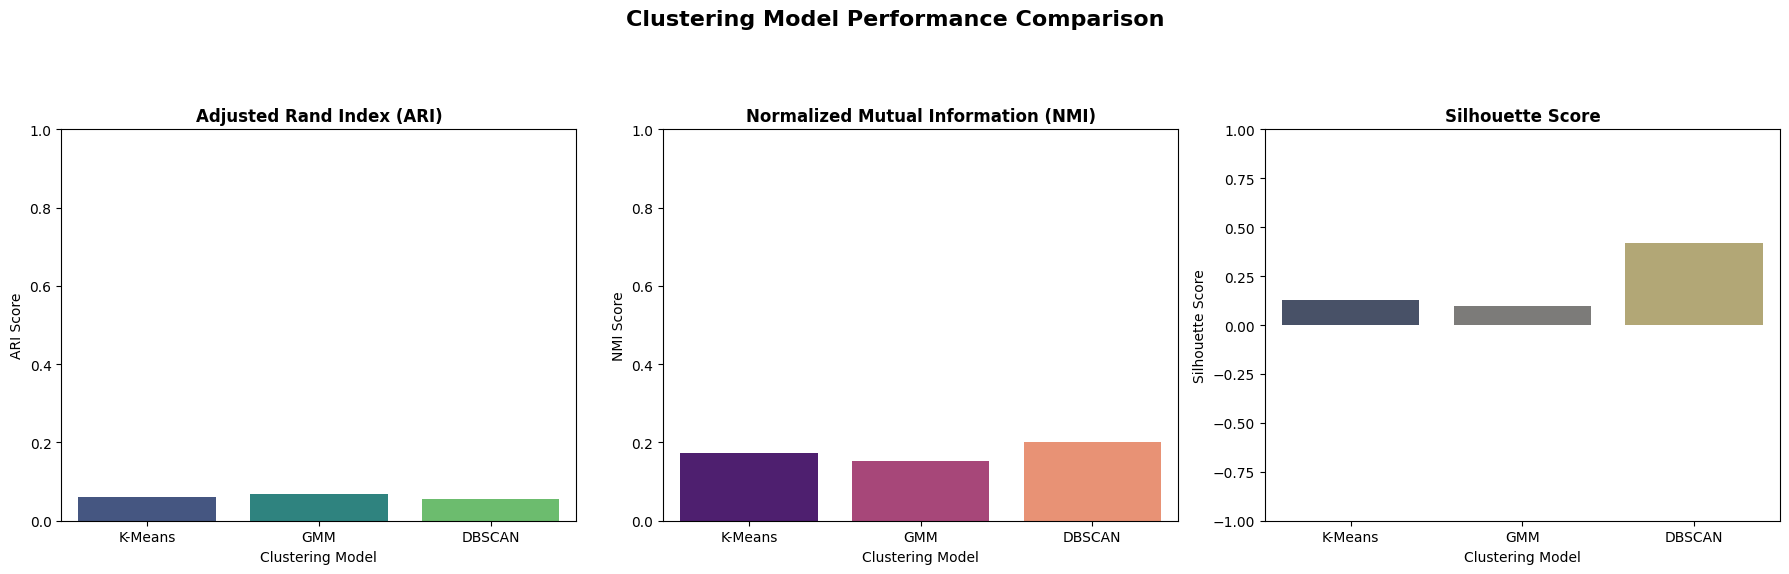

In [ ]:
# Set up the matplotlib figure and axes for three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Clustering Model Performance Comparison', fontsize=16, fontweight='bold')

# Bar plot for ARI
sns.barplot(x='Model', y='ARI', data=clustering_df, ax=axes[0], palette='viridis')
axes[0].set_title('Adjusted Rand Index (ARI)', fontweight='bold')
axes[0].set_ylabel('ARI Score')
axes[0].set_xlabel('Clustering Model')
axes[0].set_ylim(0, 1) # ARI scores are between -1 and 1

# Bar plot for NMI
sns.barplot(x='Model', y='NMI', data=clustering_df, ax=axes[1], palette='magma')
axes[1].set_title('Normalized Mutual Information (NMI)', fontweight='bold')
axes[1].set_ylabel('NMI Score')
axes[1].set_xlabel('Clustering Model')
axes[1].set_ylim(0, 1) # NMI scores are between 0 and 1

# Bar plot for Silhouette Score
sns.barplot(x='Model', y='Silhouette', data=clustering_df, ax=axes[2], palette='cividis')
axes[2].set_title('Silhouette Score', fontweight='bold')
axes[2].set_ylabel('Silhouette Score')
axes[2].set_xlabel('Clustering Model')
axes[2].set_ylim(-1, 1) # Silhouette scores are between -1 and 1

plt.tight_layout(rect=[0, 0.03, 1, 0.9]) # Adjust layout to prevent suptitle overlap
plt.savefig('clustering_metrics_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: clustering_metrics_comparison.png")

## Summary of Clustering Model Comparison

### Subtask:
Provide a summary of the clustering model comparison based on the metrics and visualizations.

#### Summary
Based on the Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), and Silhouette Score, here's a comparison of the K-Means, GMM, and DBSCAN models:

*   **Adjusted Rand Index (ARI)**: This metric measures the similarity between the true and predicted cluster assignments, correcting for chance. All models showed relatively low ARI scores, indicating that their cluster assignments do not strongly align with the true cover types. GMM had a slightly higher ARI (0.067) compared to K-Means (0.0617) and DBSCAN (0.0556), but the differences are marginal, suggesting that none of the models were highly effective at recovering the true label structure.

*   **Normalized Mutual Information (NMI)**: NMI measures the mutual dependence between the true and predicted cluster assignments. DBSCAN achieved the highest NMI (0.2021), indicating it found clusters that had a somewhat better statistical relationship with the true labels, even if the ARI was lower. K-Means (0.1723) and GMM (0.1536) followed.

*   **Silhouette Score**: This metric measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where higher values indicate better-defined clusters. DBSCAN achieved a significantly higher Silhouette Score (0.4196) compared to K-Means (0.1258) and GMM (0.0992). This suggests that the clusters identified by DBSCAN, even though they might not perfectly align with the true labels, are internally more cohesive and well-separated from each other.

*   **Training Time**: K-Means was the fastest model to train (6.37s), followed by DBSCAN (98.95s), and GMM was the slowest (125.57s) on the sampled data.

*   **Cluster Interpretation**: K-Means and GMM were set to find 7 clusters, matching the number of true cover types, but struggled to align with them. DBSCAN, on the other hand, identified a much larger number of clusters (54) and a small number of noise points. While this might indicate a finer-grained clustering structure, it further deviates from the 7 known cover types, contributing to its lower ARI score, but its high Silhouette score indicates that these numerous clusters are well-formed.

**Conclusion**: None of the unsupervised clustering models performed exceptionally well in accurately reproducing the true cover type labels, as indicated by the low ARI and NMI scores. However, DBSCAN produced the most distinct and well-separated clusters according to the Silhouette Score, albeit by forming many more clusters than the actual number of cover types. K-Means was the fastest but had lower silhouette scores, while GMM was the slowest with the lowest silhouette score among the three. These results highlight the inherent difficulty of clustering complex, high-dimensional datasets without any prior label information, especially when cluster shapes and densities might vary significantly.

## Summary:

### Data Analysis Key Findings
*   The clustering results for K-Means, GMM, and DBSCAN were successfully consolidated into a pandas DataFrame.
*   **Adjusted Rand Index (ARI):** All models exhibited low ARI scores, indicating poor alignment with the true cover types. GMM had a marginally higher ARI (0.067) compared to K-Means (0.0617) and DBSCAN (0.0556).
*   **Normalized Mutual Information (NMI):** DBSCAN achieved the highest NMI (0.2021), suggesting a better statistical relationship between its clusters and the true labels, followed by K-Means (0.1723) and GMM (0.1536).
*   **Silhouette Score:** DBSCAN significantly outperformed the other models with a Silhouette Score of 0.4196, indicating its clusters are more cohesive and well-separated than those from K-Means (0.1258) and GMM (0.0992).
*   **Training Time:** K-Means was the fastest model to train (6.37s), while GMM was the slowest (125.57s), with DBSCAN taking 98.95s.
*   **Cluster Interpretation:** K-Means and GMM were configured to find 7 clusters. DBSCAN, however, identified 54 clusters and 282 noise points, indicating a more granular or potentially noisy clustering structure.

### Insights or Next Steps
*   None of the unsupervised clustering models performed exceptionally well in accurately reproducing the true cover type labels, as evidenced by the low ARI and NMI scores. This highlights the inherent difficulty of clustering complex, high-dimensional datasets without prior label information.
*   DBSCAN, despite its lower ARI and NMI compared to some models, produced significantly more distinct and well-separated clusters based on the Silhouette Score. Further analysis of DBSCAN's numerous clusters could reveal meaningful sub-structures within the data, or suggest that the inherent cluster structure deviates from the predefined 7 cover types.
